<a href="https://colab.research.google.com/github/bonsnv/Data-Mining/blob/main/Analisis_Kualitas_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/bonsnv/Data-Mining/refs/heads/main/winequality-red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
print(data.isnull().sum())
print("\nData description:\n", data.describe())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data description:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlori

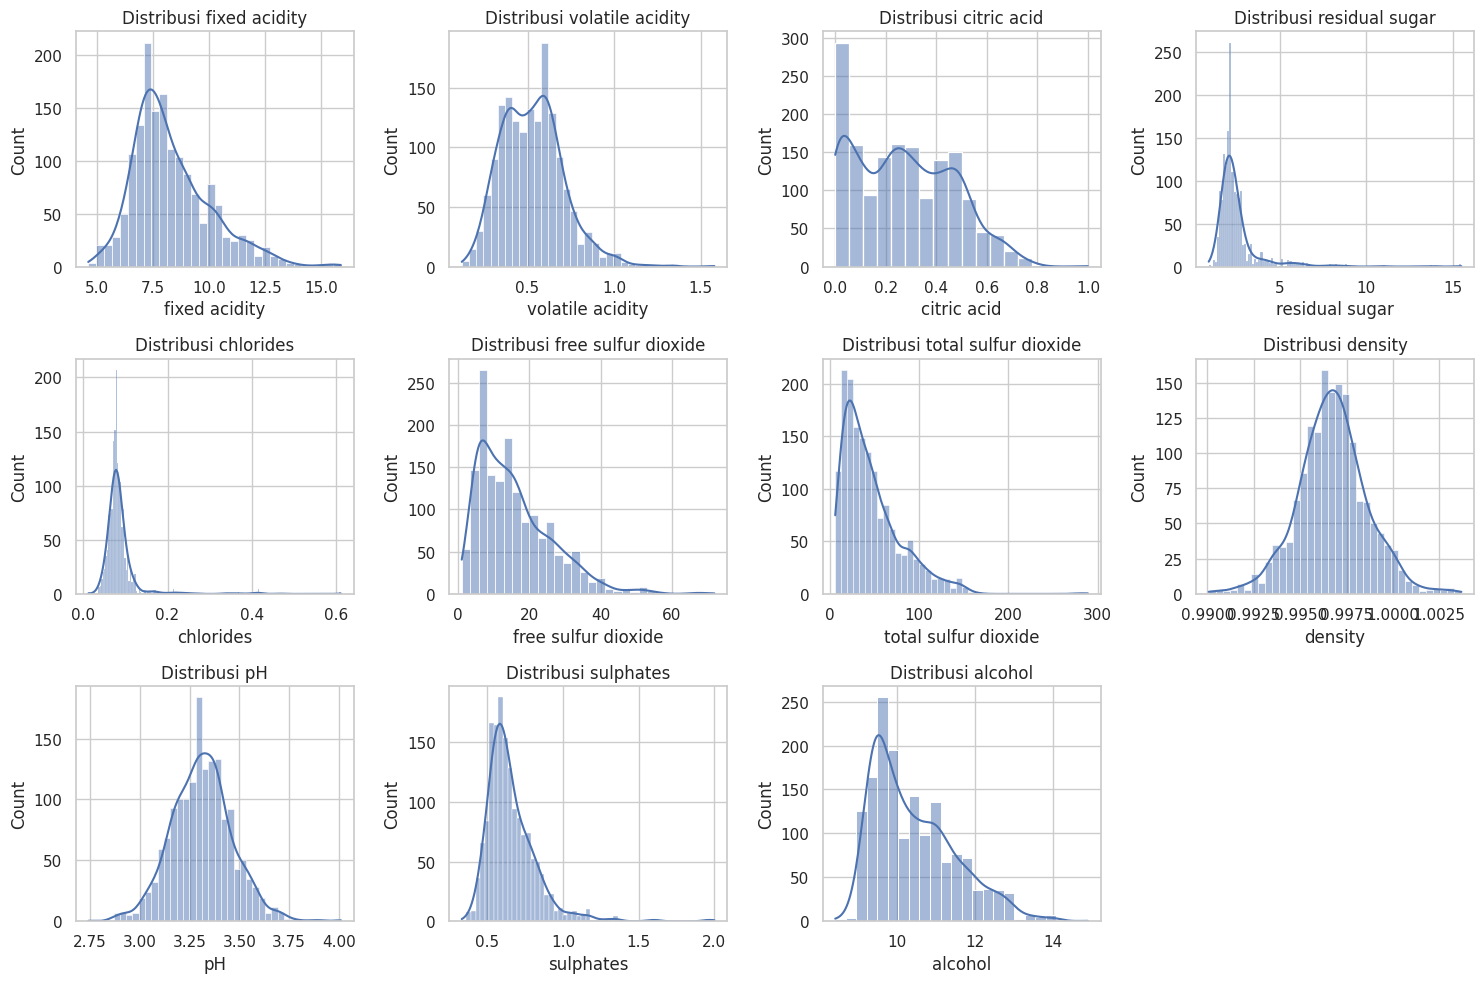

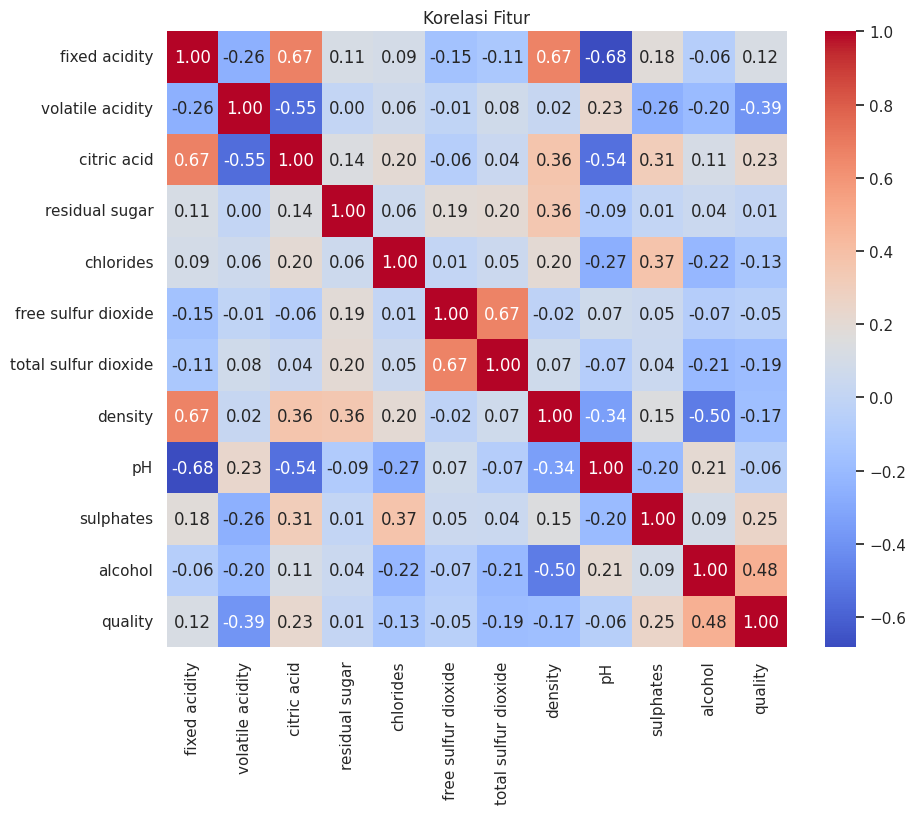

In [ ]:
# Distribusi Wine Quality
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribusi {column}")

plt.tight_layout()
plt.show()
# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

Hasil eksplorasi menunjukkan beberapa temuan penting:

* Distribusi Fitur:

Sebagian besar fitur menunjukkan distribusi yang beragam, dengan beberapa fitur (seperti volatile acidity dan alcohol) tampak memiliki distribusi yang miring. Hal ini dapat mempengaruhi performa model jika tidak dilakukan normalisasi atau transformasi lebih lanjut.

* Korelasi Antar Fitur:

Matriks korelasi menunjukkan hubungan antara fitur-fitur yang mungkin relevan untuk model. Misalnya:
Terdapat korelasi positif yang cukup kuat antara alcohol dan quality, menunjukkan bahwa wine dengan kadar alkohol lebih tinggi cenderung memiliki kualitas yang lebih baik.
fixed acidity dan citric acid menunjukkan korelasi positif yang signifikan, yang menunjukkan keterkaitan antar variabel kimia ini.

In [ ]:
# 4. Pisahkan data menjadi Fitur (X) dan Terget (Y)
X = data.drop(columns='quality')
y = data['quality']

# Memisahkan data menjadi Data Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Membuat dan Melatih Model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 6. Menghitung Matrix Evaluasi
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("\nAccuracy of Decision Tree Model:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Accuracy of Decision Tree Model: 0.559375

Confusion Matrix:
 [[ 0  0  0  1  0  0]
 [ 0  0  5  5  0  0]
 [ 1  4 88 35  2  0]
 [ 0  3 40 70 17  2]
 [ 0  1  5 14 21  1]
 [ 0  0  1  3  1  0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.63      0.68      0.65       130
           6       0.55      0.53      0.54       132
           7       0.51      0.50      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.28      0.28      0.28       320
weighted avg       0.55      0.56      0.55       320



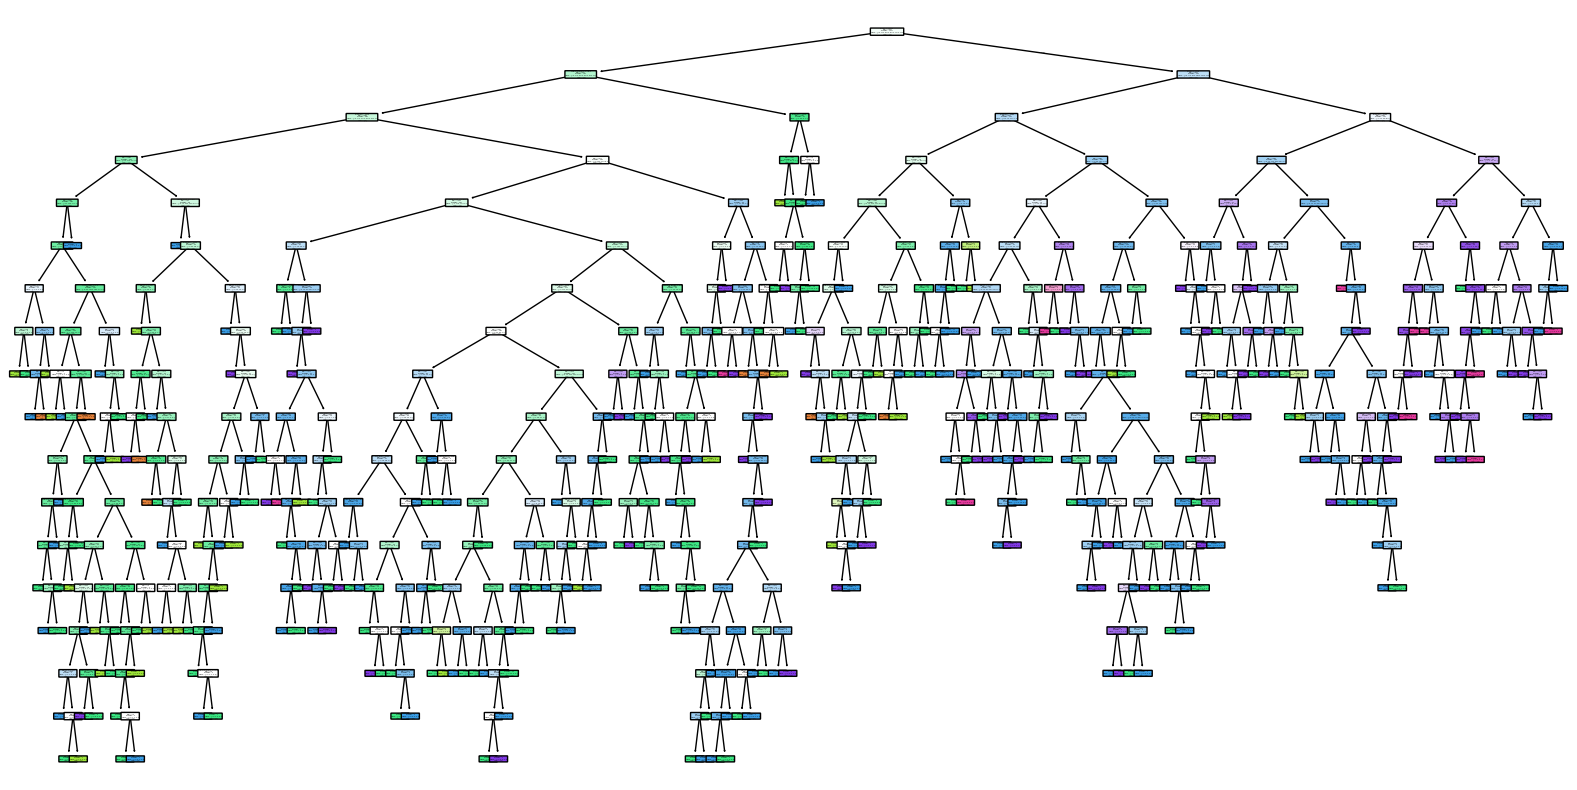

In [16]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=True, filled=True, rounded=True)
plt.show()
